<a href="https://colab.research.google.com/github/Machocho254/DS_CORE_WEEK4/blob/master/Moringa_DS_Core_Week4_Machocho_Mengo_12_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AUTOLIB DATA ANALYSIS AND STATISTICAL INFERENCES**

**Requirements**



1.   Univariate Analysis
2.   Bivariate Anaysis
3.   Hypothesis Testing



# **PROBLEM STATEMENT**

The French company wants to whether the rate of return for Bluecars in area **75015** is greater than in area **75017**


# **HYPOTHESIS**

Is the rate of return for Bluecars in 75015 greater than in 75017?



# **LOADING AND READING THE DATASET** 

The data used in this study has been obtained from http://bit.ly/DSCoreAutolibDataset and the description to the dataset will be uploaded onto this notebook. 

The provided dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging).

In [0]:
# import all the required libraries for this dataset

import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import math
import statistics
import matplotlib.pyplot as plt

import seaborn as sns

import pandas_profiling

from sklearn.cluster import KMeans

from numpy.random import seed

from numpy.random import randn

from statsmodels.graphics.gofplots import qqplot

%matplotlib inline


In [3]:
# uploading the dataset and creating the dataframe to be used. 

autolib_df = pd.read_csv("/content/autolib_daily_events_postal_code.csv")
autolib_df

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [4]:
# reading the variable descriptions
var_df = pd.read_excel("/content/columns_explanation.xlsx", sheet_name=None)
var_df


#                Column name                                        explanation
# 0              Postal code                 postal code of the area (in Paris)
              # 1                     date                        date of the row aggregation
              # 2      n_daily_data_points  number of daily data poinst that were availabl...
              # 3                dayOfWeek     identifier of weekday (0: Monday -> 6: Sunday)
              # 4                 day_type                                 weekday or weekend
              # 5       BlueCars_taken_sum    Number of bluecars taken that date in that area
              # 6    BlueCars_returned_sum  Number of bluecars returned that date in that ...
              # 7         Utilib_taken_sum      Number of Utilib taken that date in that area
              # 8      Utilib_returned_sum   Number of Utilib returned that date in that area
              # 9      Utilib_14_taken_sum  Number of Utilib 1.4 taken that date in that area
              # 10  Utilib_14_returned_sum  Number of Utilib 1.4 returned that date in tha...
              # 11         Slots_freed_sum  Number of recharging slots released that date ...
              # 12         Slots_taken_sum  Number of rechargign slots taken that date in ...)])

OrderedDict([('Sheet1',
                             Column name                                        explanation
              0              Postal code                 postal code of the area (in Paris)
              1                     date                        date of the row aggregation
              2      n_daily_data_points  number of daily data poinst that were availabl...
              3                dayOfWeek     identifier of weekday (0: Monday -> 6: Sunday)
              4                 day_type                                 weekday or weekend
              5       BlueCars_taken_sum    Number of bluecars taken that date in that area
              6    BlueCars_returned_sum  Number of bluecars returned that date in that ...
              7         Utilib_taken_sum      Number of Utilib taken that date in that area
              8      Utilib_returned_sum   Number of Utilib returned that date in that area
              9      Utilib_14_taken_sum  Number of Util

In [5]:
# checking the first observations of the dataset
autolib_df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [6]:
# checking the last observations of the dataset
autolib_df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [7]:
# getting the information about the data
autolib_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
Postal code               16085 non-null int64
date                      16085 non-null object
n_daily_data_points       16085 non-null int64
dayOfWeek                 16085 non-null int64
day_type                  16085 non-null object
BlueCars_taken_sum        16085 non-null int64
BlueCars_returned_sum     16085 non-null int64
Utilib_taken_sum          16085 non-null int64
Utilib_returned_sum       16085 non-null int64
Utilib_14_taken_sum       16085 non-null int64
Utilib_14_returned_sum    16085 non-null int64
Slots_freed_sum           16085 non-null int64
Slots_taken_sum           16085 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


# **DATA DESCRIPTION AND CLEANING**

To get the descriptive statistics of the dataset. 

To clean the data, check for outliers, missing data and filling in th data where appropriate. 

In [8]:
# Desscriptive statistics of the dataset
autolib_df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [9]:
# to get the correlation matrix of the dataframe
autolib_df.corr()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
Postal code,1.000000,0.000432,0.000343,-0.698020,-0.697519,-0.625521,-0.624786,-0.656744,-0.656516,-0.749528,-0.749157
n_daily_data_points,0.000432,1.000000,0.002039,0.029411,0.030063,0.022669,0.023322,0.025738,0.026351,0.020873,0.021169
dayOfWeek,0.000343,0.002039,1.000000,0.079649,0.081954,0.069295,0.071713,0.068790,0.071279,0.049960,0.050468
BlueCars_taken_sum,-0.698020,0.029411,0.079649,1.000000,0.998660,0.893833,0.892850,0.940946,0.940757,0.948575,0.947996
BlueCars_returned_sum,-0.697519,0.030063,0.081954,0.998660,1.000000,0.893613,0.893268,0.940542,0.941117,0.948258,0.948771
Utilib_taken_sum,-0.625521,0.022669,0.069295,0.893833,0.893613,1.000000,0.981982,0.847519,0.846304,0.853760,0.853049
Utilib_returned_sum,-0.624786,0.023322,0.071713,0.892850,0.893268,0.981982,1.000000,0.845645,0.845306,0.852939,0.852936
Utilib_14_taken_sum,-0.656744,0.025738,0.068790,0.940946,0.940542,0.847519,0.845645,1.000000,0.992062,0.899232,0.898719
Utilib_14_returned_sum,-0.656516,0.026351,0.071279,0.940757,0.941117,0.846304,0.845306,0.992062,1.000000,0.899442,0.899777
Slots_freed_sum,-0.749528,0.020873,0.049960,0.948575,0.948258,0.853760,0.852939,0.899232,0.899442,1.000000,0.999221


In [10]:
#Describe Non Integer variables
df_cat = autolib_df.dtypes[autolib_df.dtypes == 'object'].index
autolib_df[df_cat].describe()

# NOn interger variables are date and day_type which are objects
# there are 16085 observations for each of the variables
# 

,date,day_type
count,16085,16085
unique,156,2
top,5/31/2018,weekday
freq,104,11544


Change the Date to date_time

In [11]:

from datetime import datetime

# convert the date time into string 
autolib_df['date'] =  pd.to_datetime(autolib_df['date'])
autolib_df['date'].describe()

#the data records are from first January 2018 to 19th June 2018

count                   16085
unique                    156
top       2018-06-12 00:00:00
freq                      104
first     2018-01-01 00:00:00
last      2018-06-19 00:00:00
Name: date, dtype: object

In [12]:
#Unique values for each column.
autolib_df.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [13]:
#The claim we are investigating is for the Blue cars only thus we drop utilib and utilib 14 columns
df_1 = autolib_df.drop(axis= 1, columns=['Utilib_taken_sum','Utilib_returned_sum','Utilib_14_taken_sum','Utilib_14_returned_sum',])
df_1

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,22,20
1,75001,2018-01-02,1438,1,weekday,98,94,23,22
2,75001,2018-01-03,1439,2,weekday,138,139,27,27
3,75001,2018-01-04,1320,3,weekday,104,104,25,21
4,75001,2018-01-05,1440,4,weekday,114,117,18,20
...,...,...,...,...,...,...,...,...,...
16080,95880,2018-06-15,1440,4,weekday,15,10,0,0
16081,95880,2018-06-16,1440,5,weekend,19,19,0,0
16082,95880,2018-06-17,1440,6,weekend,33,35,0,0
16083,95880,2018-06-18,1440,0,weekday,11,14,0,0


In [14]:
# changing day of the week into boolian data type 
autolib_df['day_type'] = autolib_df.day_type.map({'weekday': 0, 'weekend': 1})
autolib_df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,2018-01-01,1440,0,0,110,103,3,2,10,9,22,20
1,75001,2018-01-02,1438,1,0,98,94,1,1,8,8,23,22
2,75001,2018-01-03,1439,2,0,138,139,0,0,2,2,27,27
3,75001,2018-01-04,1320,3,0,104,104,2,2,9,8,25,21
4,75001,2018-01-05,1440,4,0,114,117,3,3,6,6,18,20


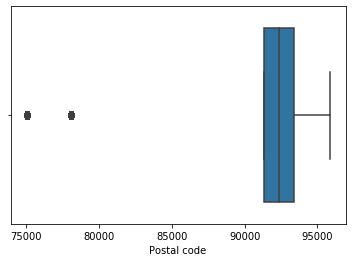

In [15]:
# checking for outliers for postal code
import seaborn as sns
sns.boxplot(x=autolib_df['Postal code'])

# there are outliers in this dataset. 
# postal codes between 75000 and 80000 are outliers

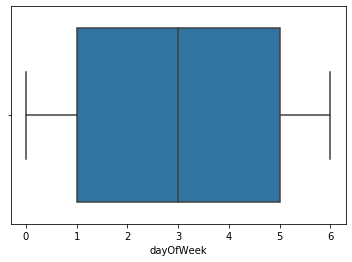

In [16]:
# checking outliers for dayOFweek
sns.boxplot(x=autolib_df['dayOfWeek'])
#  most of the observations are concetrated during the first and 5th day of the week

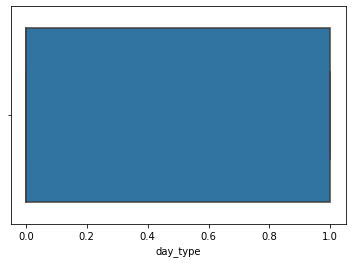

In [17]:
# checkin outliers for day type
import seaborn as sns
sns.boxplot(x=autolib_df['day_type'])

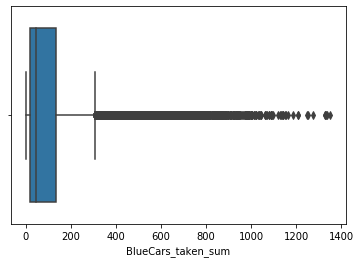

In [18]:
#Checking for outliers
sns.boxplot(x = df_1['BlueCars_taken_sum'])
#boxplot of the Blue cars taken
#There are outliers in the data since the data is right skewed

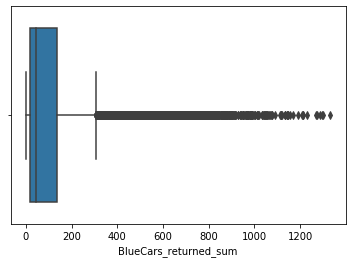

In [19]:
#Checking for outliers
sns.boxplot(x = df_1['BlueCars_returned_sum'])
#boxplot of the Blue cars returned
#There are outliers in the data since the data is right skewed

In [20]:
# using the Z score to check for outliers
z = np.abs(stats.zscore(df_1['BlueCars_taken_sum']))
print(z)

[0.08589624 0.15061389 0.06511162 ... 0.50116785 0.61981688 0.66835512]


In [36]:
# using the Z score to check for outliers
z = np.abs(stats.zscore(df_1['BlueCars_returned_sum']))
print(z)

[0.12352149 0.17204012 0.07055302 ... 0.49010667 0.6033168  0.6680083 ]


In [21]:
# to check for the number of outliers
Q1 =  df_1['BlueCars_taken_sum'].quantile(0.25)
Q3 = df_1['BlueCars_taken_sum'].quantile(0.75)
IQR = Q3 - Q1
df_1[(df_1['BlueCars_taken_sum'] < Q1-1.5*IQR ) | (df_1['BlueCars_taken_sum'] > Q3+1.5*IQR)]['BlueCars_taken_sum'].count()
#there are 2215 outliers in the data based on the BlueCars_taken_sum column

2215

In [37]:
# to check for the number of outliers
Q1 =  df_1['BlueCars_returned_sum'].quantile(0.25)
Q3 = df_1['BlueCars_returned_sum'].quantile(0.75)
IQR = Q3 - Q1
df_1[(df_1['BlueCars_returned_sum'] < Q1-1.5*IQR ) | (df_1['BlueCars_returned_sum'] > Q3+1.5*IQR)]['BlueCars_returned_sum'].count()
#there are 2215 outliers in the data based on the BlueCars_returned_sum column

2213

In [39]:
#Dropping the outliers
filterRT = (df_1['BlueCars_returned_sum'] >= Q1 - 1.5 * IQR) & (df_1['BlueCars_returned_sum'] <= Q3 + 1.5 *IQR)
df_2 = df_1.loc[filterRT]  
df_2
# 2213 records have been dropped. 

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,22,20
1,75001,2018-01-02,1438,1,weekday,98,94,23,22
2,75001,2018-01-03,1439,2,weekday,138,139,27,27
3,75001,2018-01-04,1320,3,weekday,104,104,25,21
4,75001,2018-01-05,1440,4,weekday,114,117,18,20
...,...,...,...,...,...,...,...,...,...
16080,95880,2018-06-15,1440,4,weekday,15,10,0,0
16081,95880,2018-06-16,1440,5,weekend,19,19,0,0
16082,95880,2018-06-17,1440,6,weekend,33,35,0,0
16083,95880,2018-06-18,1440,0,weekday,11,14,0,0


# **UNIVARIATE ANALYSIS**

Analysis of each variavle.



1.   Measures of central tendencies
2.   Measure of dispersion
3.   Data visualization



In [23]:
# getting the frequency table for day type variable

df_2['day_type'].value_counts()

# weekdays (represented by 0) has the frequency of 11544 
# weekends has 4541 observations.
# there is more business on weekdays vs the weekends. 


weekday    10072
weekend     3798
Name: day_type, dtype: int64

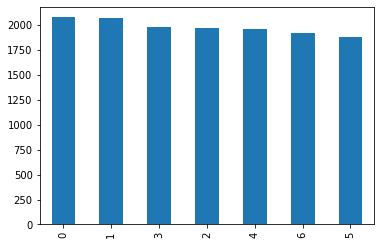

In [24]:
# getting the frequency table for the dayOfweek
df_2['dayOfWeek'].value_counts()

df_2['dayOfWeek'].value_counts().plot(kind = 'bar')

#plot of the data distribution for every day of the week.
#the Distribution has minimal variation.

# Monday and Tuesday have the most frequencies
# There is more traffic on monday and tuesday. 

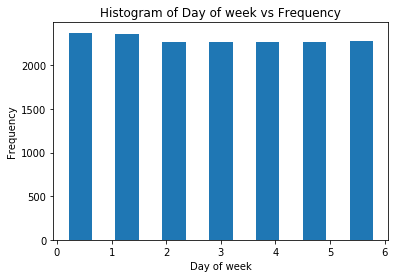

In [25]:
# histogram of day of week frequencies
day_week = autolib_df['dayOfWeek']

plt.hist(day_week, bins=7, histtype='bar', rwidth=0.5)
plt.xlabel('Day of week')
plt.ylabel('Frequency')
plt.title('Histogram of Day of week vs Frequency')
plt.show()

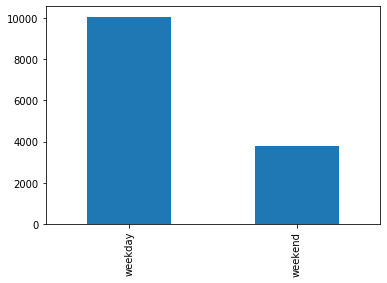

In [26]:
df_2['day_type'].value_counts().plot(kind='bar')
#plot of type of day of the week
#there are more entries during the weekdays than there are on weekends

In [27]:
# frequency table of the postal code
autolib_df['Postal code'].value_counts()

94130    156
92310    156
78140    156
94700    156
95100    156
        ... 
93150    151
93370    149
92340    147
93200    126
93390     84
Name: Postal code, Length: 104, dtype: int64

(array([6009., 3347., 1573.,  886.,  595.,  477.,  224.,  214.,  278.,
         267.]),
 array([  0. ,  30.7,  61.4,  92.1, 122.8, 153.5, 184.2, 214.9, 245.6,
        276.3, 307. ]),
 <a list of 10 Patch objects>)

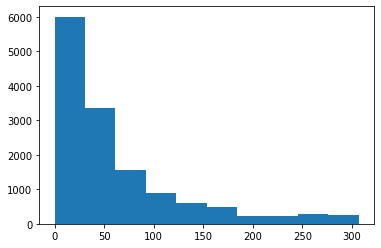

In [28]:
# histogram of Bluecars taken 

plt.hist(df_2['BlueCars_taken_sum'])
# The data is right skewed 

(array([5986., 3449., 1488.,  897.,  590.,  491.,  227.,  190.,  290.,
         264.]),
 array([  0. ,  30.7,  61.4,  92.1, 122.8, 153.5, 184.2, 214.9, 245.6,
        276.3, 307. ]),
 <a list of 10 Patch objects>)

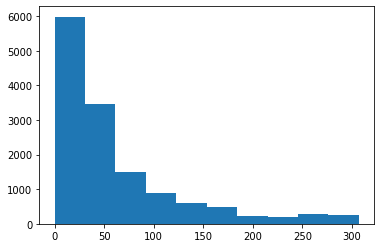

In [40]:
# histogram of returned Bluecars
plt.hist(df_2['BlueCars_returned_sum'])

# the data is skewed

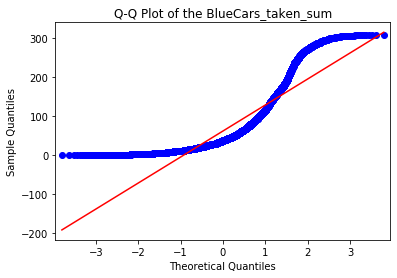

In [29]:
# checking for normality test
#Bluecars taken distribution on a Q-Q plot
qqplot(df_2['BlueCars_taken_sum'], line='s')
plt.title("Q-Q Plot of the BlueCars_taken_sum")
plt.show()

#Does not follow a normal distribution
#The qqplot confirms that the data is skewed

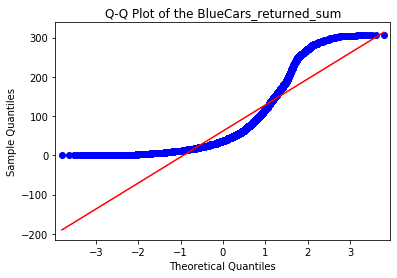

In [41]:
# checking for normality test
#Bluecars Returned distribution on a Q-Q plot
qqplot(df_2['BlueCars_returned_sum'], line='s')
plt.title("Q-Q Plot of the BlueCars_returned_sum")
plt.show()

#Does not follow a normal distribution
#The qqplot confirms that the data is skewed

In [30]:
# measures of central tendencies
# mean

mean_bluecarRT = autolib_df['BlueCars_returned_sum'].mean() #mean of sum returned bluecars
print ("Mean of Returned Bluecar is",  mean_bluecarRT)

print("/n")

mean_bluecarTK = autolib_df['BlueCars_taken_sum'].mean() #mean of taken bluecars
print("Mean of Taken Bluecar is", mean_bluecarTK)

 

Mean of Returned Bluecar is 125.912713708424
/n
Mean of Taken Bluecar is 125.92695057506994


In [31]:
# measures of dispersion and spread 
# variance
var_bluecarRT = autolib_df['BlueCars_returned_sum'].var() #variance of returned Bluecars 
print ("Variance of Returned Bluecars is", var_bluecarRT)

print("/n")

var_bluecarTK = autolib_df['BlueCars_taken_sum'].var() #variance of taken Bluecars
print ("Variance of Taken Bluecars is", var_bluecarTK)




Variance of Returned Bluecars is 34410.819413706275
/n
Variance of Taken Bluecars is 34383.01611333789


In [32]:
# standard deviation
std_blueRT = autolib_df['BlueCars_returned_sum'].std()
print("Standard dev of Returned bluecars is", std_blueRT)

print ("/n")

std_blueTK = autolib_df['BlueCars_taken_sum'].std()
print("The std of taken bluecars is ", std_blueTK)

Standard dev of Returned bluecars is 185.50153480148427
/n
The std of taken bluecars is  185.42657876727893


# **BIVARIATE ANALYSIS**

This will be the anaysis of:

*   Day of the week and Bluecar
*   Type of Day and Bluecar
*   Postal code and Day of week
*   Postal code and Bluecar
*   Bluecars taken and Bluecar returned





Text(0.5, 1.0, 'Sum of BlueCars returned  per day')

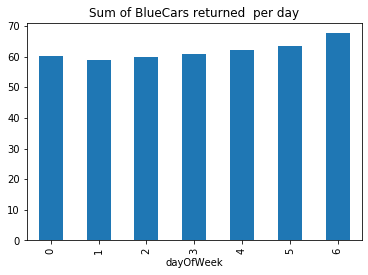

In [42]:
# Average number of Bluecars taken per day

df_3 = df_2
df_3
df_3.groupby('dayOfWeek')['BlueCars_returned_sum'].mean().plot(kind='bar')
plt.title('Sum of BlueCars returned  per day')

Text(0.5, 1.0, 'Sum of BlueCars returned on weekends and weekdays')

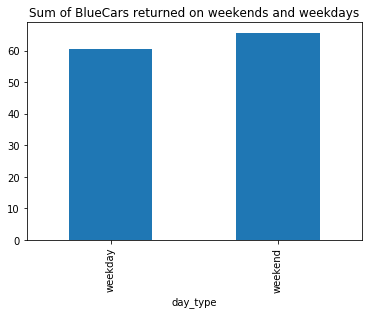

In [43]:
# average sum of Bluecars taken per type of day (weekend or weekday)
df_4 = df_2
df_4
df_4.groupby('day_type')['BlueCars_returned_sum'].mean().plot(kind='bar')
plt.title('Sum of BlueCars returned on weekends and weekdays')

In [46]:
#Correlation between Blue cars taken and Blue Cars returned
df_5 = df_4
df_5
df_5['BlueCars_taken_sum'].corr(df_5['BlueCars_returned_sum'])
#There is very high correlation between the rate at which the  Blue cars are taken and returned

0.995643439946841

# **HYPOTHESIS TESTING**

Hypothesis:

Null Hypothesis:
The rate of return for Bluecars is greater in area **75015** than in area **75017**

Alternate Hypothesis:
The rate of return for Bluecars is equal in both areas. 

Ho: μ0 => μ1

H1: μ0 = μ1

**Significance Level**

Significance level is set at 1%

α = 0.01


**Test Statistic**

T test will be adopted as the observations are less than 30

The t test formula is:   ![alt text](https://www.statsdirect.com/help/generatedimages/equations/equation166.svg)


In [48]:
# to get the records from area 75015
df_75015 = df_2[df_2['Postal code'] == 75015]
df_75015

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
2238,75015,2018-02-24,1396,5,weekend,58,93,22,24
2339,75015,2018-06-19,1370,1,weekday,49,52,7,8


In [50]:
# to get the descriptive statistics from area 75015
df_75015.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
count,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,75015.0,1383.000000,3.000000,53.500000,72.500000,14.500000,16.000000
std,0.0,18.384776,2.828427,6.363961,28.991378,10.606602,11.313708
min,75015.0,1370.000000,1.000000,49.000000,52.000000,7.000000,8.000000
25%,75015.0,1376.500000,2.000000,51.250000,62.250000,10.750000,12.000000
50%,75015.0,1383.000000,3.000000,53.500000,72.500000,14.500000,16.000000
75%,75015.0,1389.500000,4.000000,55.750000,82.750000,18.250000,20.000000
max,75015.0,1396.000000,5.000000,58.000000,93.000000,22.000000,24.000000


In [49]:
# to get the records from area 75017
df_75017 = df_2[df_2['Postal code'] == 75017]
df_75017

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
2550,75017,2018-02-24,1396,5,weekend,51,57,12,10
2651,75017,2018-06-19,1370,1,weekday,38,41,5,5


In [51]:
# to get descriptive statistics for 75017
df_75017.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
count,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,75017.0,1383.000000,3.000000,44.500000,49.000000,8.500000,7.500000
std,0.0,18.384776,2.828427,9.192388,11.313708,4.949747,3.535534
min,75017.0,1370.000000,1.000000,38.000000,41.000000,5.000000,5.000000
25%,75017.0,1376.500000,2.000000,41.250000,45.000000,6.750000,6.250000
50%,75017.0,1383.000000,3.000000,44.500000,49.000000,8.500000,7.500000
75%,75017.0,1389.500000,4.000000,47.750000,53.000000,10.250000,8.750000
max,75017.0,1396.000000,5.000000,51.000000,57.000000,12.000000,10.000000


In [0]:
#importing the ttest library
from scipy.stats import ttest_ind

In [55]:
ttest_ind(df_75015['BlueCars_returned_sum'], df_75017['BlueCars_returned_sum'])

Ttest_indResult(statistic=1.067906051604825, pvalue=0.3973863709407197)

# **Conclusions from Test**
α = 0.01
THe P-Value is 0.397386 which is greater than the value of alpha.

We have insufficient evidence to reject the null hypothesis. THe rate of return for Bluecars is significantly similar for both areas 75015 and 75017. 



# **Test Sensitivity**

There was no sufficient evidence to reject the null hypothesis. More tests need to be carried out to further investigate the claim. 

The data was not normally distributed,and hence using the mean to investigate may have been insufficient to give meaningful insight.